In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

disney_df_processed = pd.read_csv('../data/processed/processed_disney.csv')
netflix_df_processed = pd.read_csv('../data/processed/processed_netflix.csv', delimiter=';')

In [15]:
disney_df_processed['date_added'] = pd.to_datetime(
    disney_df_processed['date_added'])

netflix_df_processed['date_added'] = pd.to_datetime(
    netflix_df_processed['date_added'])

# EDA

### Matches

In [16]:
# Merge disney_df_processed and netflix_df_processed DataFrames on the 'title' column using an inner join
common_titles = pd.merge(disney_df_processed, netflix_df_processed, on='title', how='inner')
 
# Find the titles unique to disney_df_processed by subtracting the common titles
disney_only_titles = set(disney_df_processed['title']).difference(common_titles['title'])

# Find the titles unique to netflix_df_processed by subtracting the common titles
netflix_only_titles = set(netflix_df_processed['title']).difference(common_titles['title'])

print(f'Disney unique: {len(disney_only_titles)}')
print(f'Netflix unique: {len(netflix_only_titles)}')
print(f'In common: {len(common_titles)}')

Disney unique: 1404
Netflix unique: 8756
In common: 43


### TV Shows vs Movies

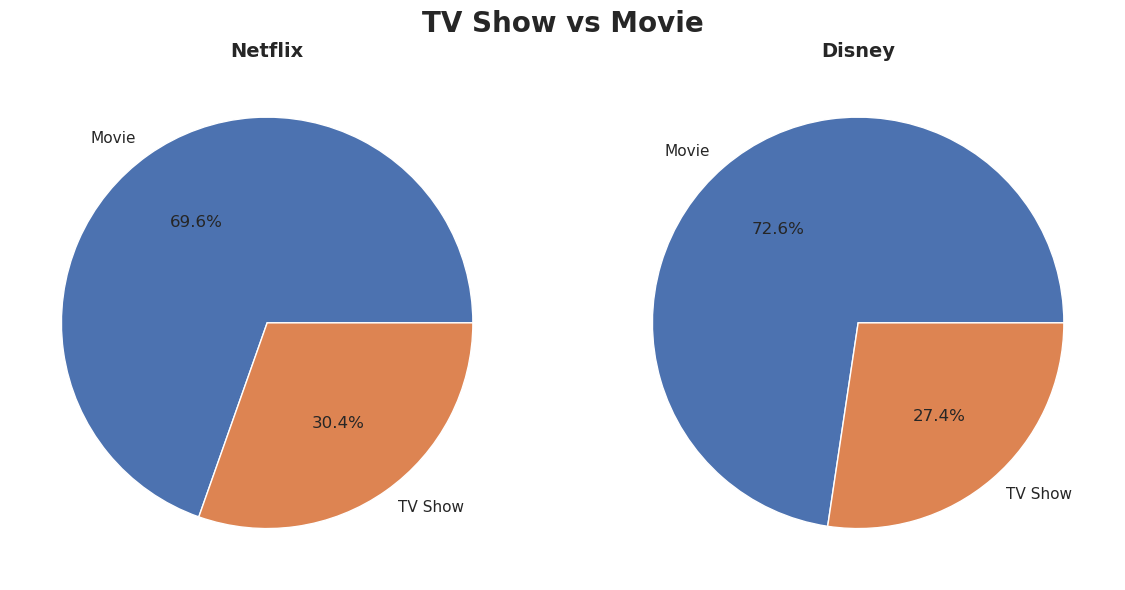

In [17]:
# Create 2 pie charts that compare the counts of Movies vs Tv Shows
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Netflix
counts = netflix_df_processed['type'].value_counts()
axs[0].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
axs[0].set_title('Netflix', fontsize=14, fontweight='bold')

# Disney
counts = disney_df_processed['type'].value_counts()
axs[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
axs[1].set_title('Disney', fontsize=14, fontweight='bold')

# General
plt.suptitle('TV Show vs Movie', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

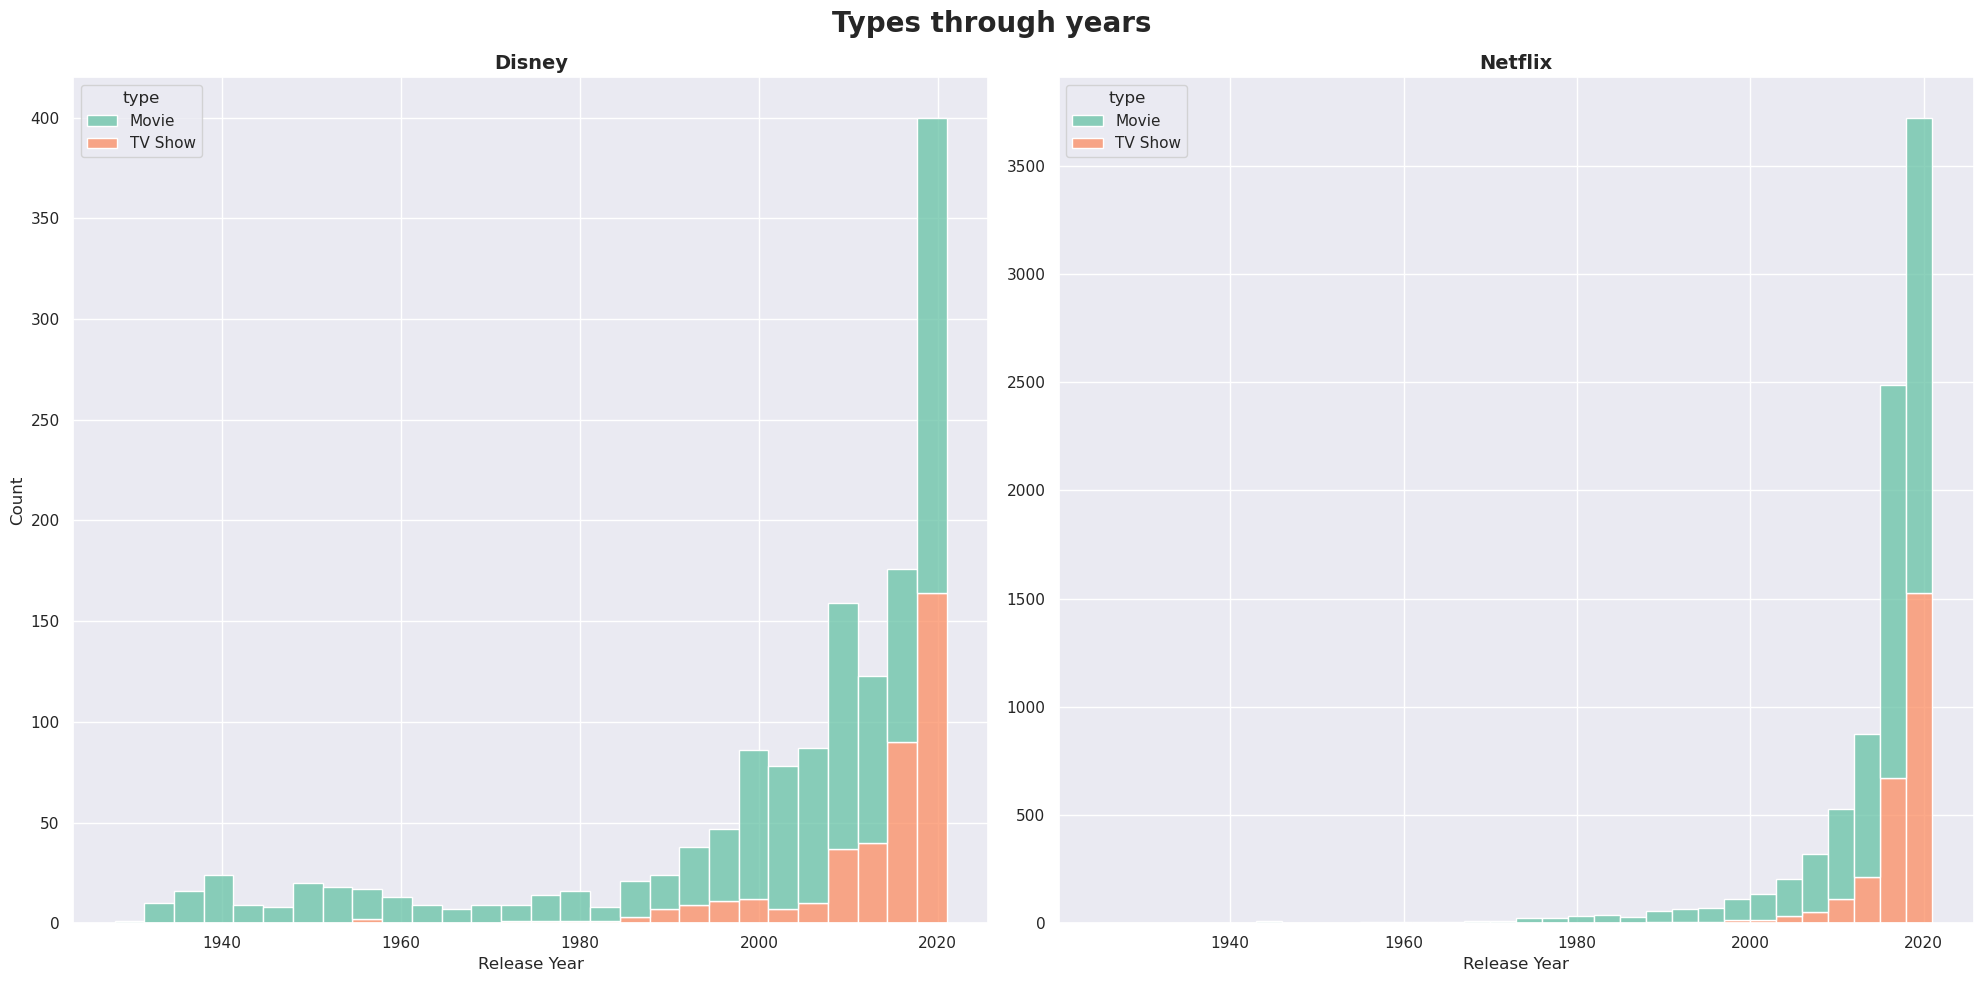

In [18]:
# Creates two charts that display the distribution of movie and TV show releases over time for Disney and Netflix separately.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Disney
sns.histplot(disney_df_processed, x='release_year', hue='type',
             multiple='stack', palette='Set2', ax=axs[0])
axs[0].set_title('Disney', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Release Year')

# Netflix 
sns.histplot(netflix_df_processed, x='release_year', hue='type',
             multiple='stack', palette='Set2', ax=axs[1], binwidth=3)
axs[1].set_title('Netflix',fontsize=14, fontweight='bold')
axs[1].set_xlabel('Release Year')
axs[1].set_ylabel('')

# General
plt.suptitle('Types through years', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Release by Year

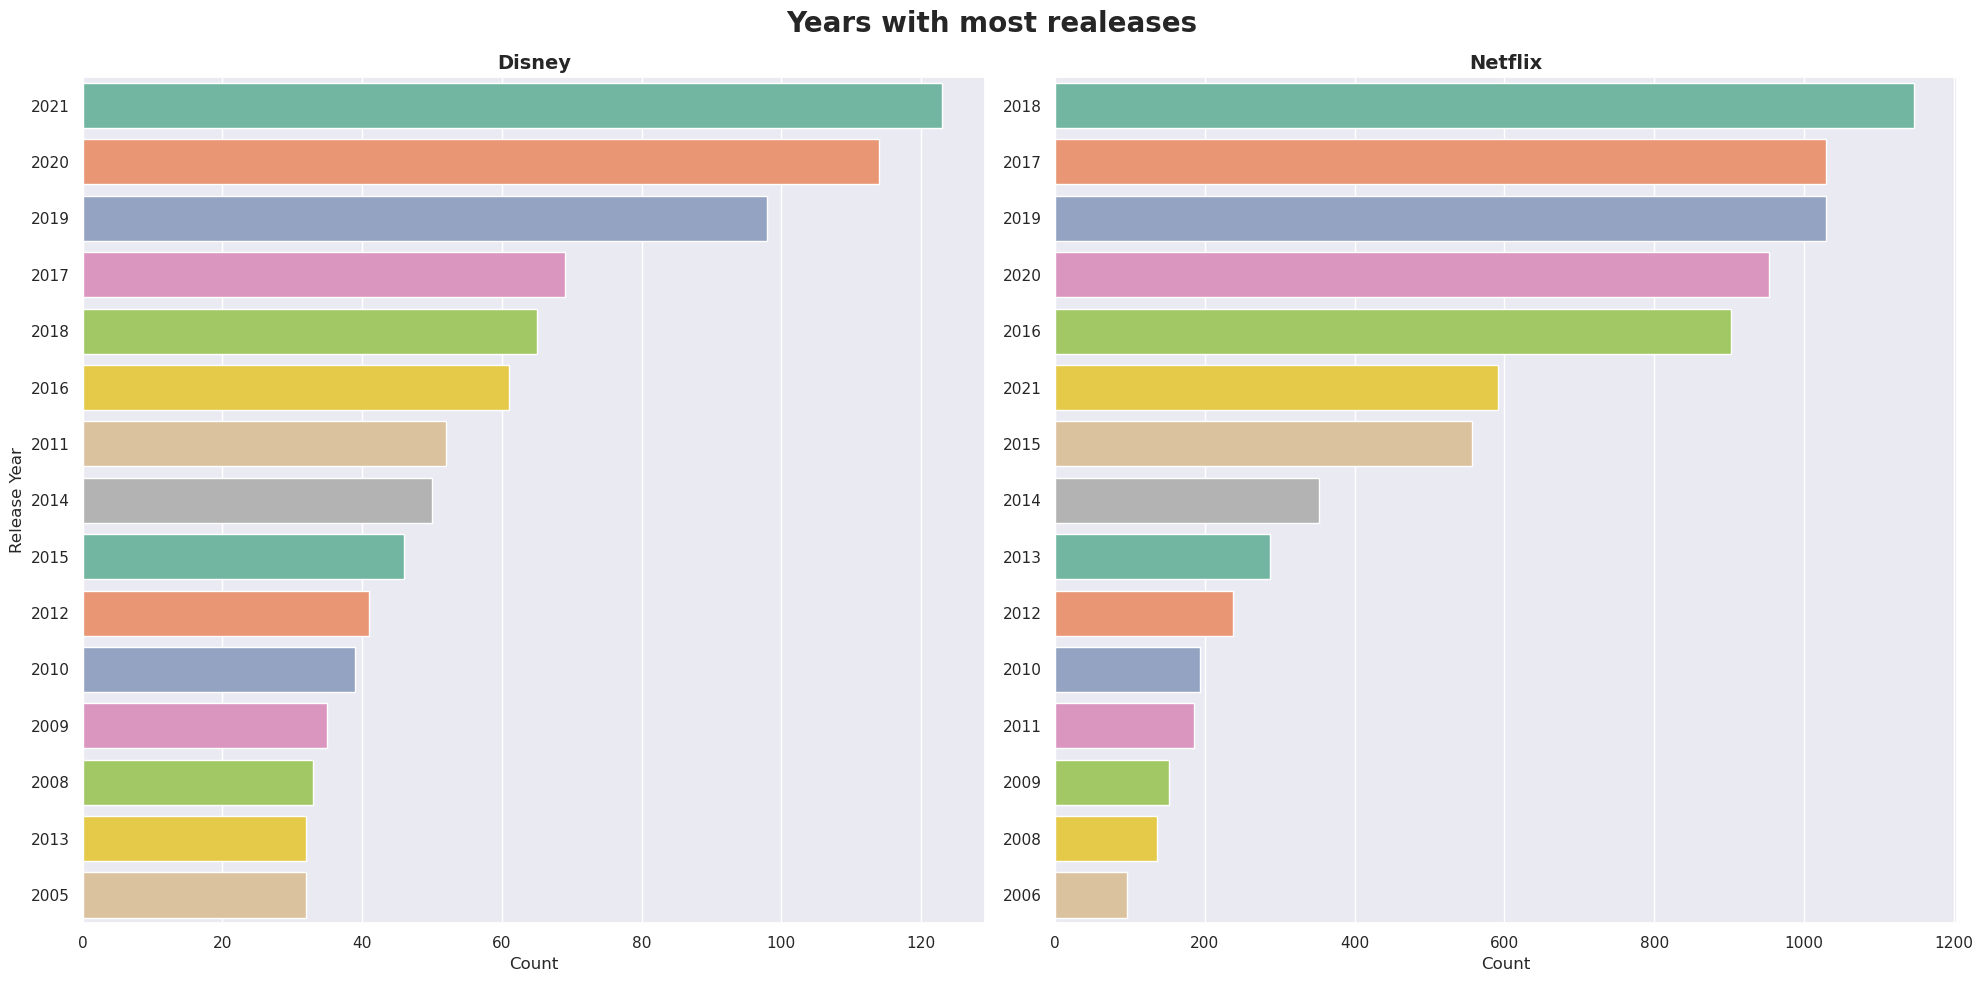

In [19]:
# Creates two charts that display the count of movie and TV show releases over the top 15 most common release years for Disney and Netflix separately.
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Disney
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=disney_df_processed, palette='Set2',
                   order=disney_df_processed['release_year'].value_counts().index[0:15], ax=axs[0])
ax.set_title('Disney', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Release Year')

# Netflix
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_df_processed, palette='Set2',
                   order=netflix_df_processed['release_year'].value_counts().index[0:15], ax=axs[1])
ax.set_title('Netflix', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('')

# General
plt.suptitle('Years with most realeases', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Titles by Rating

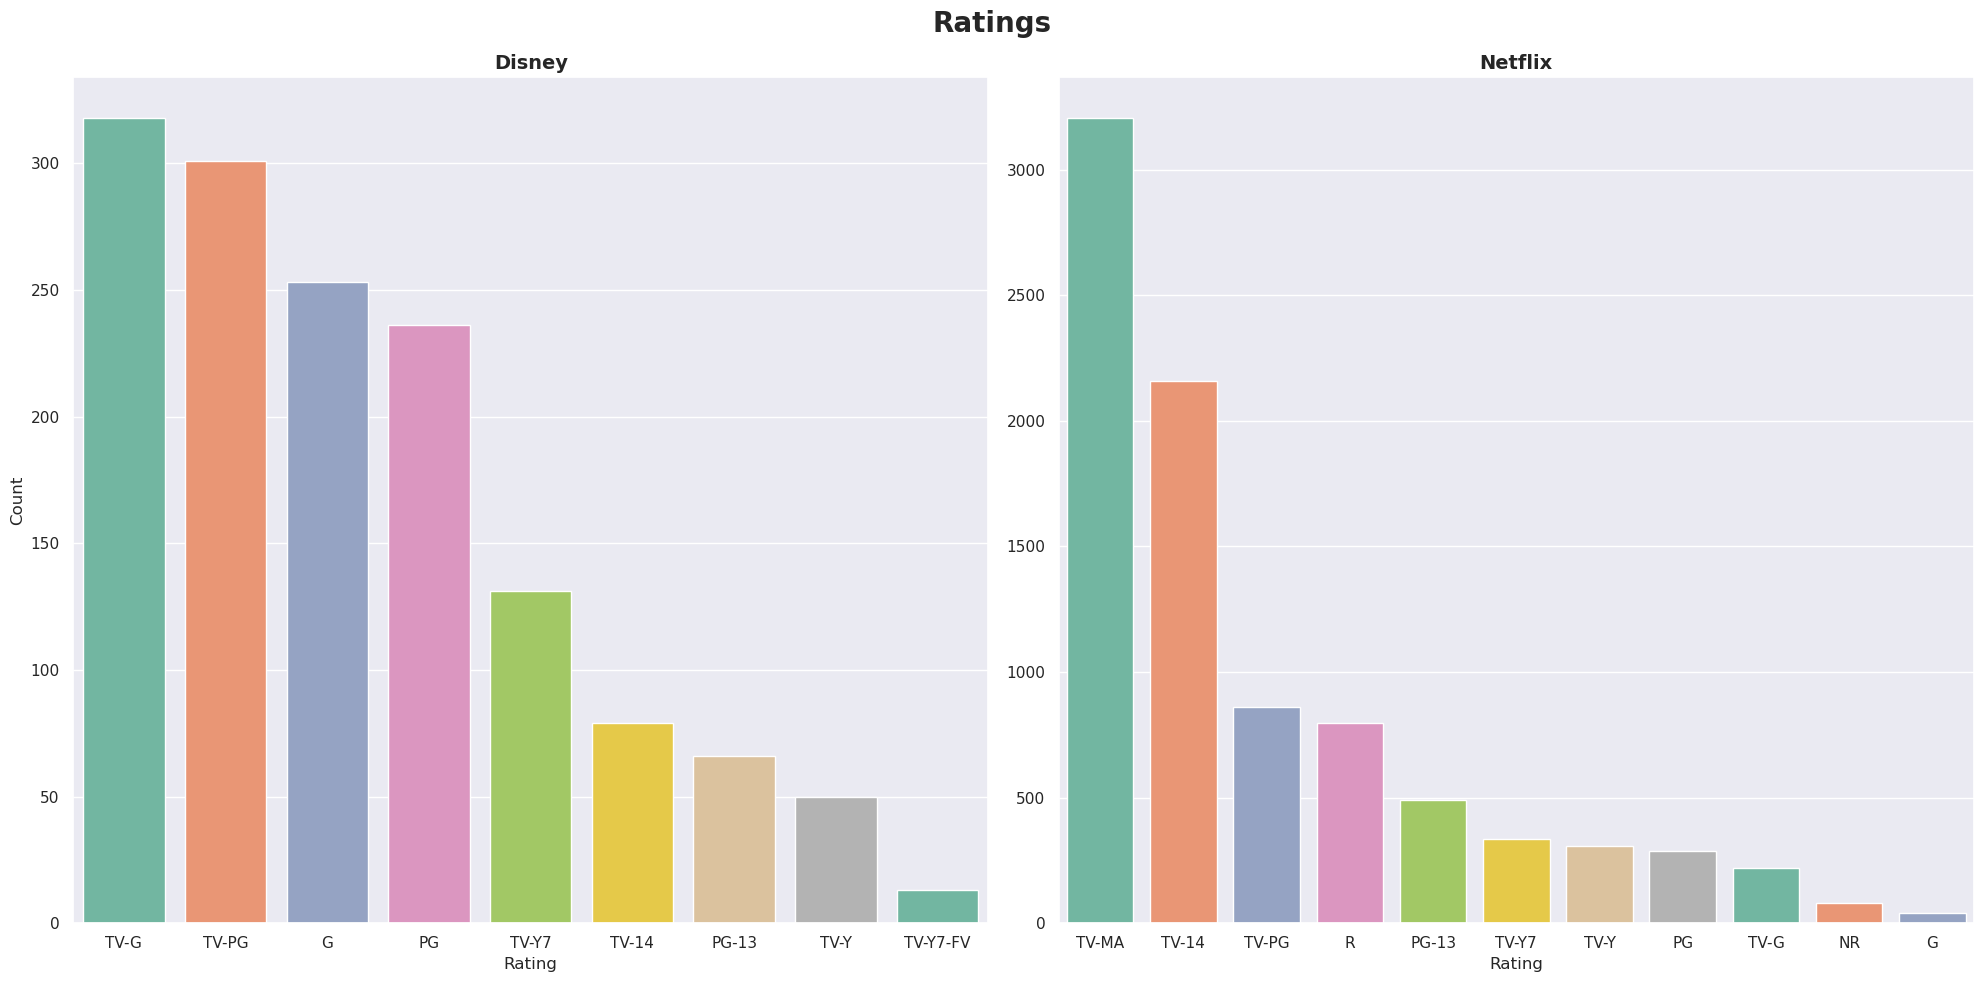

In [20]:
# Creates two charts that display the count of movie and TV show ratings for Disney and Netflix separately
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Disney
sns.countplot(x='rating', data=disney_df_processed, palette='Set2',
              order=disney_df_processed['rating'].value_counts().index[0:15], ax=axs[0])
axs[0].set_title('Disney', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Count')

# Netflix
sns.countplot(x='rating', data=netflix_df_processed, palette='Set2',
              order=netflix_df_processed['rating'].value_counts().index[0:11], ax=axs[1])
axs[1].set_title('Netflix', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('')

# General
plt.suptitle('Ratings',fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Director

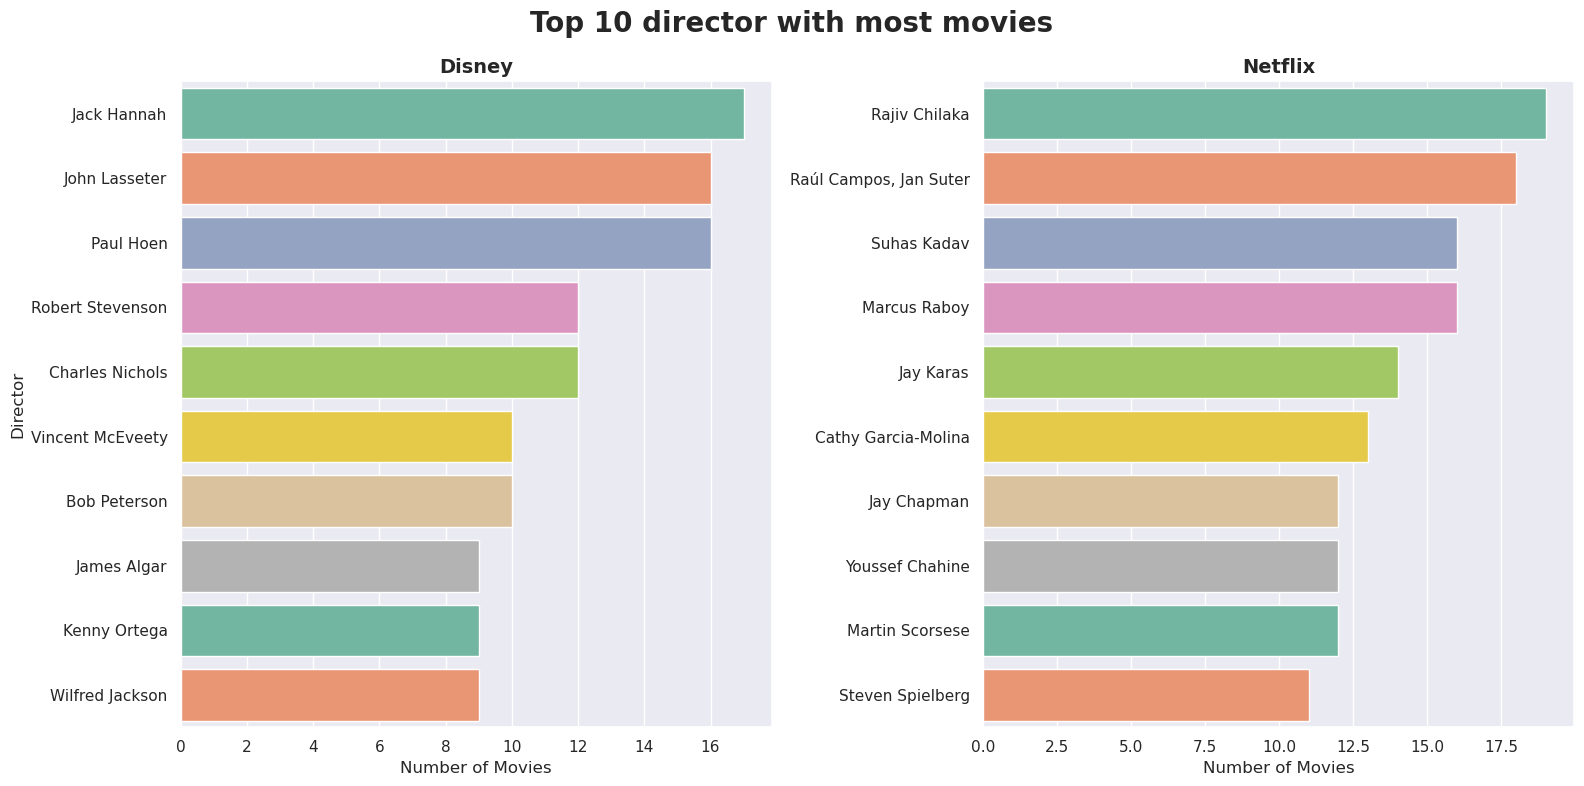

In [21]:
# Creates two charts that display the top 10 directors with the most movies on Disney and Netflix, respectively
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Disney
top10_director = disney_df_processed[disney_df_processed['director']
                                      != 'Unknown Director']['director'].value_counts().head(10)
sns.barplot(x=top10_director.values, y=top10_director.index,
            palette='Set2', ax=axs[0])
axs[0].set_title('Disney',fontsize=14, fontweight='bold')
axs[0].set_xlabel('Number of Movies')
axs[0].set_ylabel('Director')

# Netflix
top10_director = netflix_df_processed[netflix_df_processed['director']
                                       != 'Unknown Director']['director'].value_counts().head(10)
sns.barplot(x=top10_director.values, y=top10_director.index,
            palette='Set2', ax=axs[1])
axs[1].set_title('Netflix',fontsize=14, fontweight='bold')
axs[1].set_xlabel('Number of Movies')
axs[1].set_ylabel('')

# General
plt.suptitle('Top 10 director with most movies',fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Months

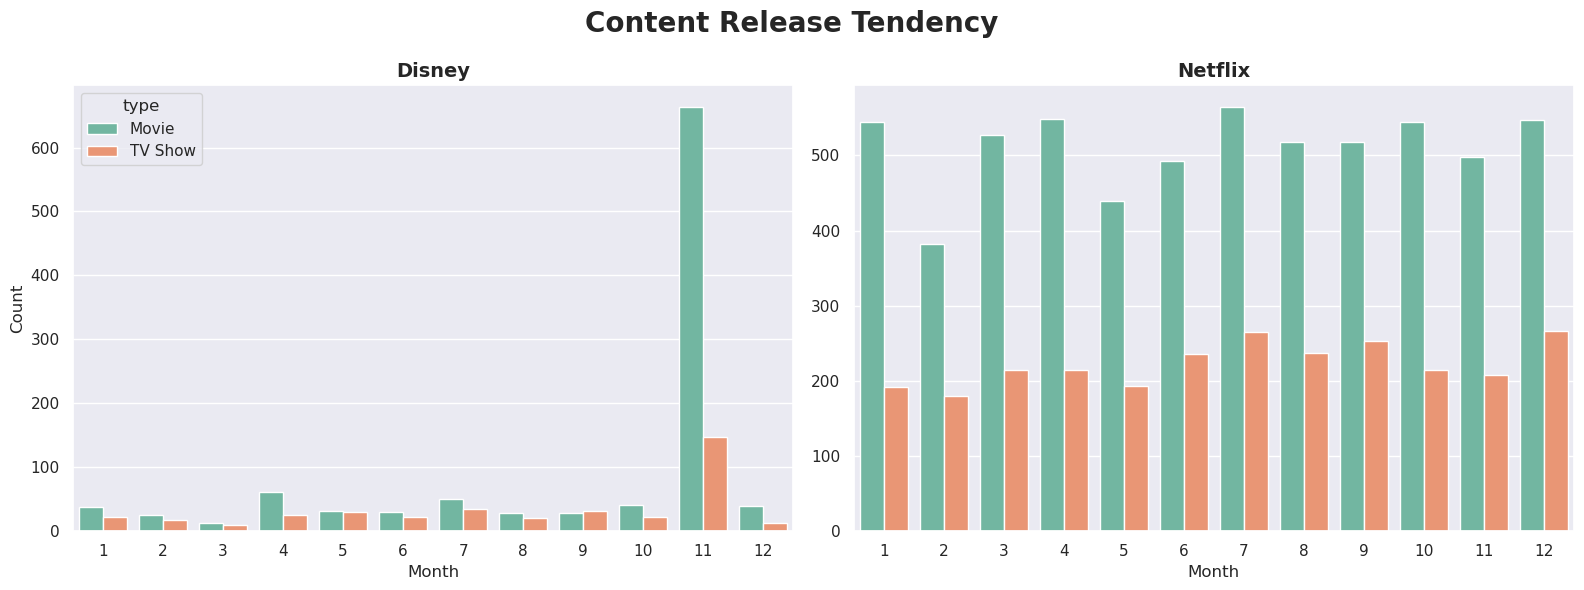

In [22]:
# Creates two subplots, side by side, that display the release tendency of Disney and Netflix content by month
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Disney
disney_month = disney_df_processed['date_added'].dt.month
sns.countplot(x=disney_month, hue='type',
              data=disney_df_processed, palette='Set2', ax=axs[0])
axs[0].set_title('Disney',fontsize=14, fontweight='bold')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')

# Netflix
netflix_month = netflix_df_processed['date_added'].dt.month
sns.countplot(x=netflix_month, hue='type',
              data=netflix_df_processed, palette='Set2', ax=axs[1])
axs[1].set_title('Netflix', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('')
axs[1].legend_.remove()

# General
plt.suptitle('Content Release Tendency',fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Titles by country

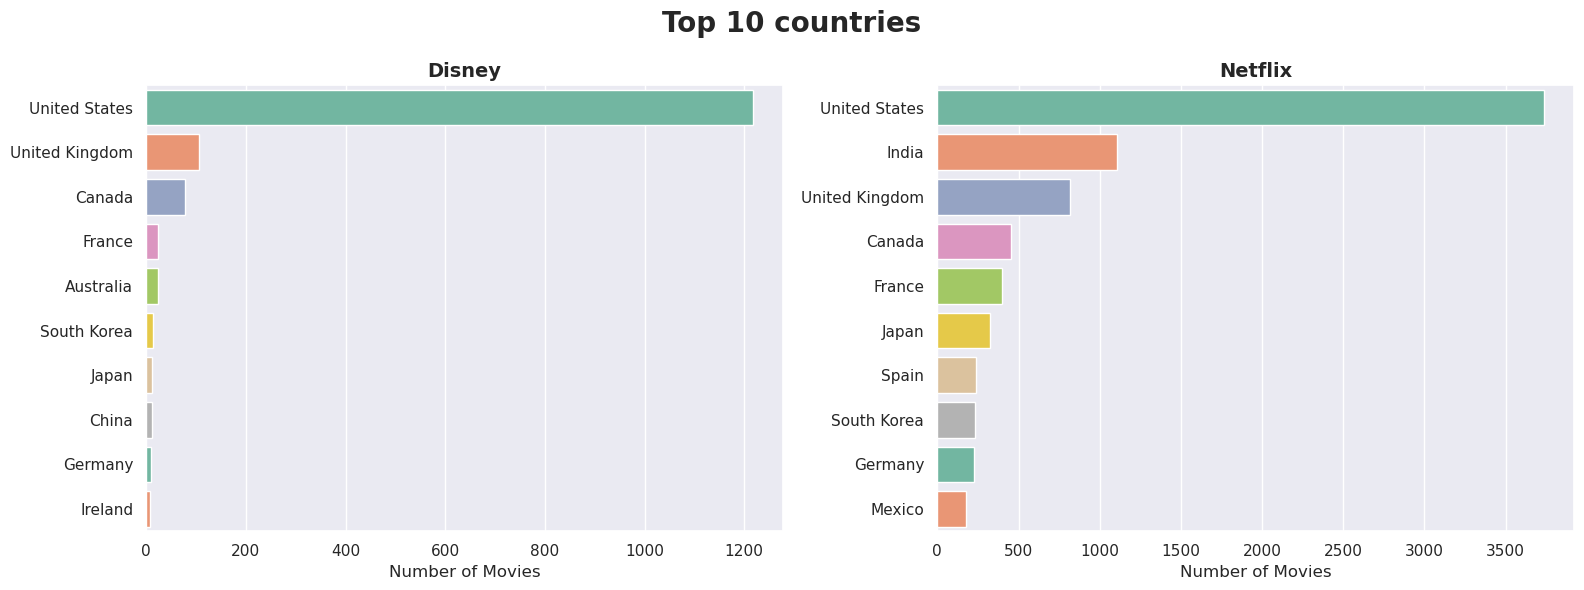

In [23]:
# Creates bar chart for the top 10 countries with the most movies in both Disney and Netflix's streaming platforms
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Disney
disney_df_processed = disney_df_processed[~disney_df_processed['country'].str.contains(
    'Unknown Country')]
# Unnest
disney_df_exploded = disney_df_processed.assign(
    country=disney_df_processed['country'].str.split(', ')).explode('country')

top_10_countries = disney_df_exploded['country'].value_counts().head(10)

sns.barplot(x=top_10_countries.values, y=top_10_countries.index,
            palette='Set2', ax=axs[0])
axs[0].set_title('Disney', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Number of Movies')
axs[0].set_ylabel('')

# Netflix
netflix_df_processed = netflix_df_processed[~netflix_df_processed['country'].str.contains(
    'Unknown Country')]
# Unnest
netflix_df_exploded = netflix_df_processed.assign(
    country=netflix_df_processed['country'].str.split(', ')).explode('country')

top_10_countries = netflix_df_exploded['country'].value_counts().head(10)

sns.barplot(x=top_10_countries.values, y=top_10_countries.index,
            palette='Set2', ax=axs[1])
axs[1].set_title('Netflix', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Number of Movies')
axs[1].set_ylabel('')

# General
plt.suptitle('Top 10 countries', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Actors

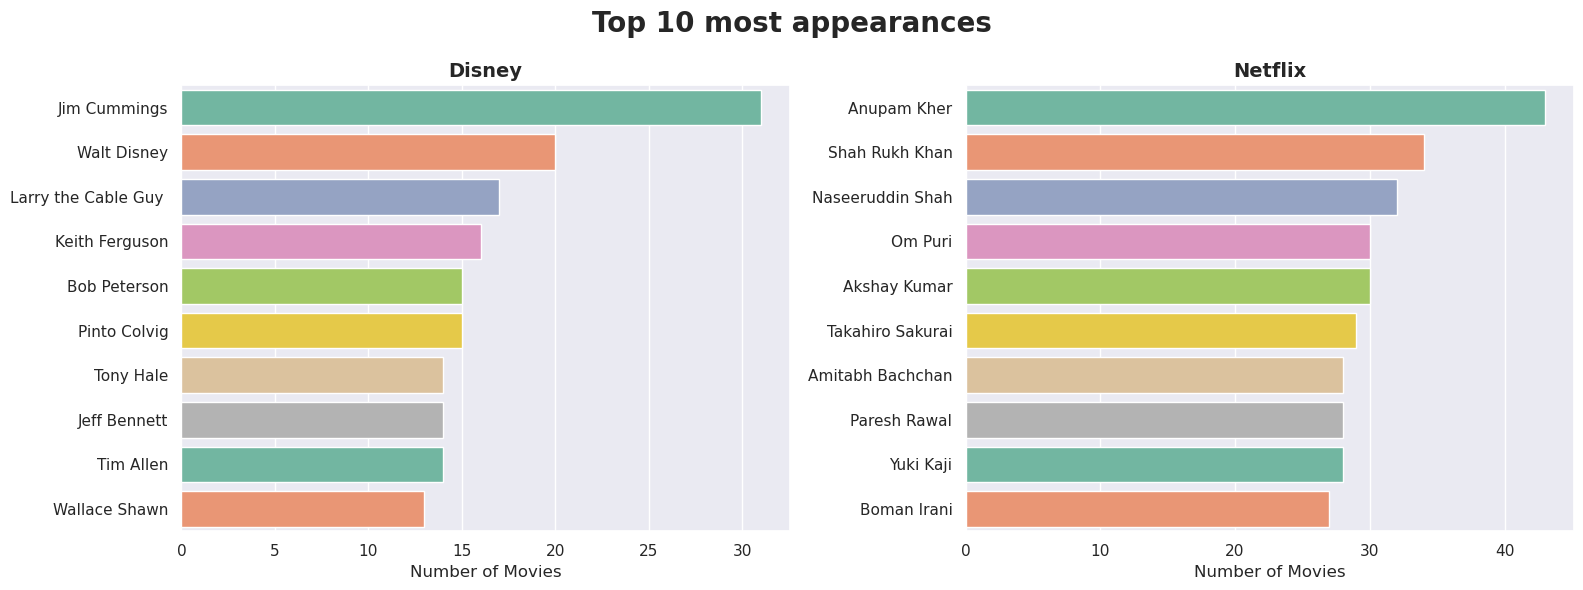

In [24]:
# Creates two bar plots, one for Disney and one for Netflix, showing the top 10 actors with the most appearances in their movies
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Disney
disney_df_processed = disney_df_processed[~disney_df_processed['actors'].str.contains(
    'Unknown Actors')]
# Unnest
disney_df_exploded = disney_df_processed.assign(
    actors=disney_df_processed['actors'].str.split(', ')).explode('actors')

top_10_actors = disney_df_exploded['actors'].value_counts().head(10)

sns.barplot(x=top_10_actors.values, y=top_10_actors.index,
            palette='Set2', ax=axs[0])
axs[0].set_title('Disney', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Number of Movies')
axs[0].set_ylabel('')

# Netflix
netflix_df_processed = netflix_df_processed[~netflix_df_processed['actors'].str.contains(
    'Unknown Actors')]
# Unnest
netflix_df_exploded = netflix_df_processed.assign(
    actors=netflix_df_processed['actors'].str.split(', ')).explode('actors')

top_10_actors = netflix_df_exploded['actors'].value_counts().head(10)

sns.barplot(x=top_10_actors.values, y=top_10_actors.index,
            palette='Set2', ax=axs[1])
axs[1].set_title('Netflix', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Number of Movies')
axs[1].set_ylabel('')

# General
plt.suptitle('Top 10 most appearances', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
disney_df_processed.head()

,show_id,type,title,director,actors,country,date_added,release_year,rating,duration,listed_in,description
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!"
4,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s8,TV Show,Port Protection Alaska,Unknown Director,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2021-11-24,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
7,s9,TV Show,Secrets of the Zoo: Tampa,Unknown Director,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2021-11-24,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...


In [26]:
netflix_df_processed.head()

,show_id,type,title,director,actors,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
